# Análisis de patrones de éxito en videojuegos para planificación publicitaria
## Caso de estudio de Ice Store 2016-2017  
La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Debemos identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Contamos con datos que se remontan a 2016. Con esta información trataremos de crear una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Objetivo del proyecto
El objetivo de este proyecto, es determinar cuál es el mejor plan publicitario para la campaña del año 2017 con respecto a las ventas obtenidas en 2016.


## Inicialización

In [1]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# cargamos los datos del dataset
df_games = pd.read_csv('./dataset/games.csv')

In [3]:
# mostramos el contenido del dataframe obtenido
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Descripción de datos:  
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género) 
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
* EU_sales (ventas en Europa en millones de dólares estadounidenses) 
* JP_sales (ventas en Japón en millones de dólares estadounidenses) 
* Other_sales (ventas en otros países en millones de dólares estadounidenses) 
* Critic_Score (máximo de 100) 
* User_Score (máximo de 10) 
* Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Preparación de los datos

Convertiremos los nombres de las columnas a minúsculas para tener un código sintácticamente consistente.

In [4]:
df_games.columns=df_games.columns.str.lower()
df_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Vemos cúal es el tipo de datos para cada columna y si hay valores ausentes.

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Tipos de datos y valores ausentes
Vemos que hay valores ausentes en la columna name, year_of_release, genre, critic_score, user_score y rating.  
Además debemos corregir los tipos de datos para las columnas year_of_release, ya que contiene años sin decimales, y user_score, que contiene calificaciones con punto decimal. 

#### Nombre y genero

In [6]:
# valores ausentes para la columna 'name'
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
# valores ausentes para la columna 'genre'
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Vemos que los valores ausentes de las columnas 'name' y 'genre' se tratan de los mismos casos, los cuales solo son dos. Eliminar estos registros no representará un cambio significativo en las estadísticas, además de que no contienen información suficiente para un análsis.

In [8]:
# eliminamos los vales ausentes para las columnas 'name' y 'genre'
df_games=df_games.dropna(subset=['name','genre'])

#### Año de lanzamiento

In [9]:
# obtenemos una muestra de los registros sin año de lanzamiento
df_games[df_games['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [10]:
# contamos el número de valores ausentes
df_games['year_of_release'].isna().sum()

269

La columna ‘year_of_release’ tiene 269 valores ausentes, algunos de los cuales contiene otros datos que nos podrían ser de utilidad. Sin embargo, no es un dato que pueda deducirse fácilmente a partir de otros valores y dado que estos datos representarían apenas un 1.6% del total, eliminarlos no tendra una afectación perceptible. 

In [11]:
df_games.dropna(subset=['year_of_release'], inplace=True)

Verifiquemos si podemos hacer la conversión de float a int para la columna 'year_of_release'

In [12]:
print(np.array_equal(df_games['year_of_release'],df_games['year_of_release'].astype('int')))

True


Es seguro convertir la columna de año de lanzamiento a tipo entero, ya que no contiene valores con punto decimal.

In [13]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

####  Puntuación de la crítica y puntuación de los usuarios

Revisemos los valores ausentes para las puntuaciones.

In [51]:
# visualizamos el número de valores ausentes y tbd para la puntuación del usuario
print(df_games['user_score'].value_counts(dropna=False).head())

user_score
NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
Name: count, dtype: int64


Los juegos que tienen una puntuación de los usuarios ‘por determinar’ (tbd) también los trataremos como datos ausentes. Por esta razón, les asignaremos el valor 'NaN'.

In [52]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan) # asignamos NaN a los juegos con tbd

In [53]:
print('valores ausentes en critic_score:',df_games['critic_score'].isna().sum())
print('valores ausentes en user_score:',df_games['user_score'].isna().sum())

valores ausentes en critic_score: 8461
valores ausentes en user_score: 8981


Los valores ausentes de las columnas 'critic_score' y 'user_score', indican que los juegos no recibieron una puntuación, por parte de los usuarios o la crítica, pero aún conservan otros datos. Por otro lado, no podemos sustituir estos valores con 0, pues esto sesgará los resultados a la izquierda, así que usaremos una medida de tendencia central.  
Realizaremos un estudio de la distribución de los datos para decidir que medida será mejor para sustituir los valores ausentes.

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

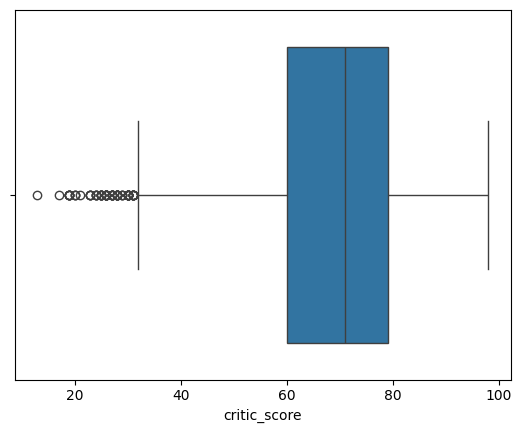

In [59]:
sns.boxplot(x=df_games['critic_score'])
df_games['critic_score'].describe()

In [55]:
# convertimos el tipo de datos de la columna 'user_score' de 'object' a 'float' para poder obtener la mediana
df_games['user_score'] = df_games['user_score'].astype('float')

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

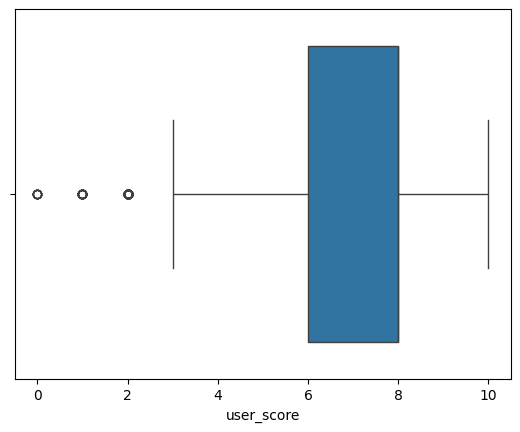

In [60]:
sns.boxplot(x=df_games['user_score'].round(0))
#labels = df_games['user_score'].round(0).unique()
#plt.xticks(ticks=range(0, len(labels), 5), labels=labels[::5], rotation=45)  # Mostrar cada 5 etiquetas
#plt.show()
df_games['user_score'].describe()


Se puede observar que ambos campos presentan valores atípicos. Por ello, el uso de la media podría introducir un sesgo en los datos. En este escenario, la mediana será la opción más adecuada.

In [61]:
# obtenemos las medianas para las columnas númericas
critic_score_median = df_games['critic_score'].median()
user_score_median = df_games['user_score'].median()
print(critic_score_median)
print(user_score_median)

71.0
7.5


In [62]:
# sustituimos las valores ausentes con la mediana para la puntuación de la critica y usuarios
df_games.fillna({'critic_score':critic_score_median}, inplace=True)
df_games.fillna({'user_score':user_score_median}, inplace=True)

#### Clasificación ESRB

In [64]:
print('Valores ausentes en la columna "rating":',df_games['rating'].isna().sum())

Valores ausentes en la columna "rating": 6676


In [65]:
df_games[df_games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


Para el caso especifico de la clasificación, no podemos asignarles una categoría específica a los videojuegos con valores ausentes. Hacerlo podría distorsionar las estadísticas y sesgarlas a favor del género elegido. Además no se muestra un patrón claro con respecto a otras carácterísticas.  
Por esto asignaremos una clasificación a estos registros con respecto a la clasificación ESRB más popular para cada genero.

In [84]:
def rating_ESRB(genre):
    return df_games[df_games['genre']==genre]['rating'].value_counts().idxmax()

In [66]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [102]:
missing_ratings = df_games['rating'].isna()

df_games.loc[missing_ratings, 'rating'] = df_games.loc[missing_ratings, 'genre'].apply(rating_ESRB)

In [104]:
# vemos el dataframe resultante después de las transformaciones
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Ventas totales
Calcularemos las ventas totales para cada juego, sumando las ventas de cada región y crearemos una nueva columna con ese dato.

In [105]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64


## Análisis de datos

### Lanzamientos anuales  

Graficaremos el número de videojuegos lanzados por año para ver si existe algún patrón o diferencia significativa.

In [106]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,T,31.38


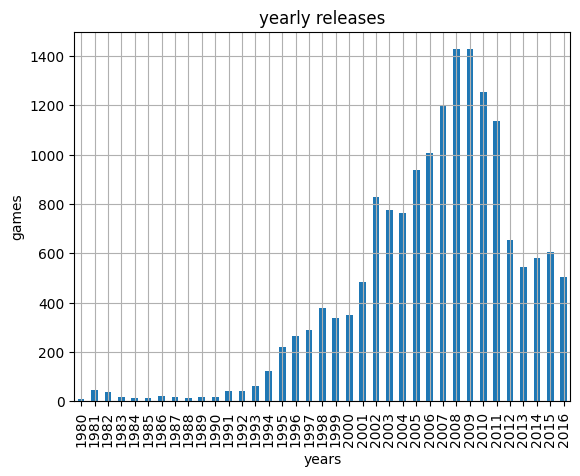

In [28]:
games_per_year = df_games['year_of_release'].value_counts().sort_index()
games_per_year.plot(
    kind='bar', 
    title='yearly releases', 
    xlabel='years',
    ylabel='games',
    grid=True
)
plt.show()

Entre 2002 y 2011, hubo un auge en el lanzamiento de videojuegos. En los años más recientes, el número de lanzamientos se ha reducido y se ha mantenido en un promedio aproximado de 500 a 600 juegos por año.

### Plataformas
Realizaremos un análisis con respecto a los datos anuales de las plataformas con mayores ventas. Con estos resultados, veremos el incremento o la disminución en las ventas de cada plataforma atravez de los años.

In [107]:
# Obtenemos una lista de las plataformas con mejores ventas en los últimos años
df_last_games = df_games[df_games['year_of_release']>2011] # filtramos los videjuegos más recientes
df_platforms = df_last_games.groupby('platform')['total_sales'].sum().sort_values()
print(df_platforms)

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.79
PS4     314.14
Name: total_sales, dtype: float64


In [108]:
# obtenemos las ventas de los lanzamientos anuales (2011 en adelante), agrupados por plataforma
df_platforms_per_year = df_last_games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
df_platforms_per_year.head(10)

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


In [109]:
# Transformamos las plataformas en columnas y los años en índices
pivot_platforms_per_year = df_platforms_per_year.pivot_table(index='year_of_release', columns='platform', values='total_sales')
pivot_platforms_per_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<Axes: title={'center': 'Yearly Sales'}, xlabel='years', ylabel='sales (MD)'>

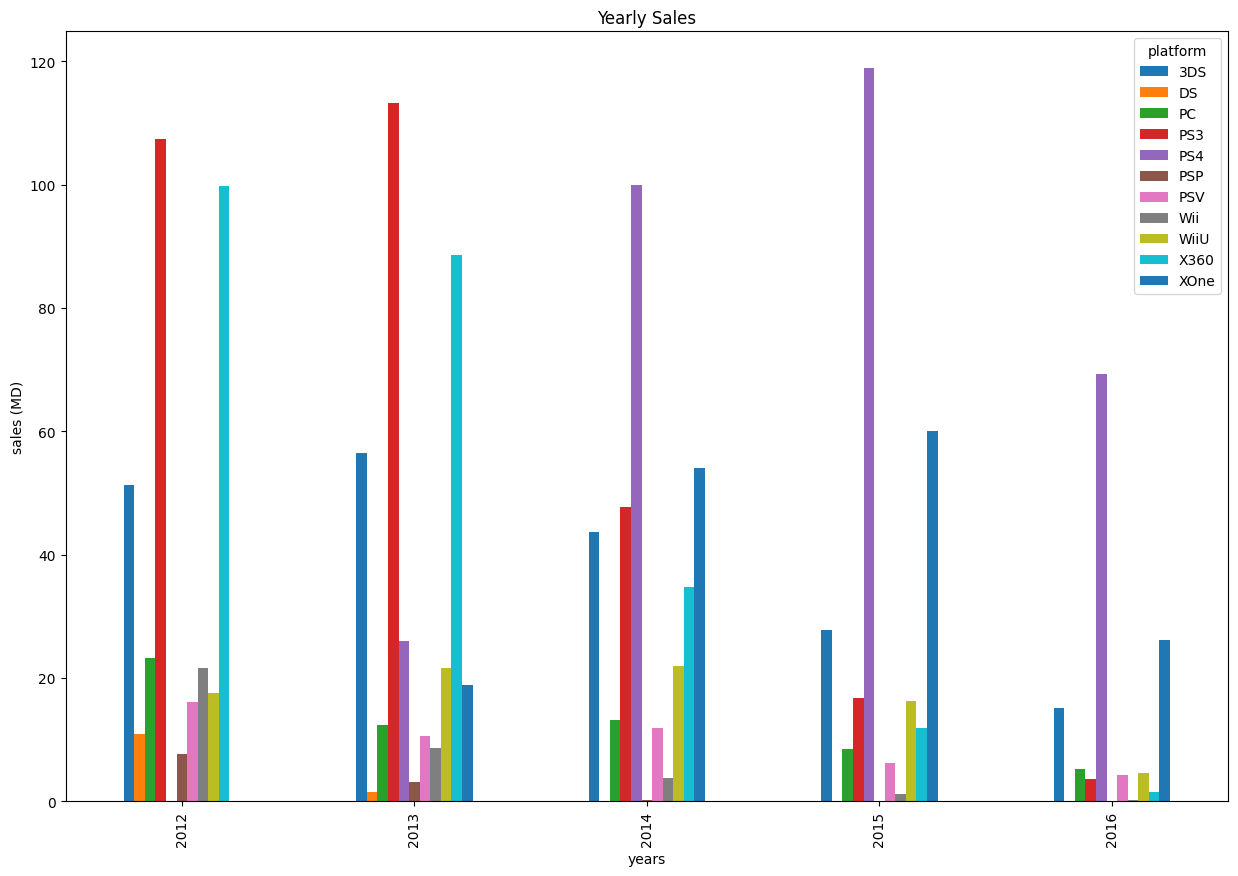

In [110]:
colores = plt.cm.coolwarm(np.linspace(0, 1, len(pivot_platforms_per_year)))
pivot_platforms_per_year.plot(
    kind='bar',
    title='Yearly Sales',
    xlabel='years',
    ylabel='sales (MD)',
    figsize=[15,10],
    #color=colores
)

In [111]:
# obtenemos los años transcurridos para el tiempo en el mercado de cada plataforma
df_platforms_per_year.groupby('platform')['year_of_release'].max()-df_platforms_per_year.groupby('platform')['year_of_release'].min()

platform
3DS     4
DS      1
PC      4
PS3     4
PS4     3
PSP     3
PSV     4
Wii     4
WiiU    4
X360    4
XOne    3
Name: year_of_release, dtype: int32

Con respecto al gráfico obtenido, podemos observar varias cosas. En primer lugar, notamos que una plataforma puede desaparecer del mercado en un periodo de 4 años, mientras que las nuevas plataformas, pueden alcanzar su pico máximo de ventas en un periodo de 3 años. Por ejemplo, tenemos la plataforma PS4, que es relativamente nueva y recien lleva 4 años en el mercado.  
Así mismo, es interesante ver cómo algunas plataformas que antes dominaban el mercado, como el Xbox 360, han reducido sus ventas significativamente. Esto podría deberse a la aparición de nuevas versiones de la misma consola o a la competencia de otras plataformas, así como el lanzamiento de nuevos juegos que no son compatibles con las antiguas plataformas.

A partir de la información obtenida y con el objetivo de obtener resultados más significativos, nos centraremos únicamente en el período de 2011 a 2016, ya que el objetivo de este proyecto es obtener un plan de negocio para obtener mejores ventas en 2017 y lo mejor será tener información actualizada.   

Con respecto a las ventas registradas en los últimos años, las plataformas que han experimentado un incremento en sus ventas o que han logrado mantenerse en el mercado a pesar del paso del tiempo, y por ello son más rentables, son XOne, PS4, 3DS, PC y WiiU.

In [112]:
# obtenemos una df en el que solo se incluyan videojuegos que hayan sido lanzados después del 2011
df_games_filtered = df_games[df_games['year_of_release']>=2011]


### Ventas globales de todos los juegos, desglosados por plataforma.

In [113]:
df_sales_per_platform = df_games_filtered.groupby('platform')['total_sales'].sum()
print(df_sales_per_platform.sort_values())

platform
PS2       0.45
PSP      29.01
DS       38.73
PSV      53.81
WiiU     82.19
Wii      95.02
PC       97.68
XOne    159.32
3DS     257.81
PS4     314.14
X360    380.38
PS3     445.57
Name: total_sales, dtype: float64


count     12.000000
mean     162.842500
std      149.576645
min        0.450000
25%       50.040000
50%       96.350000
75%      271.892500
max      445.570000
Name: total_sales, dtype: float64


<Axes: ylabel='total_sales'>

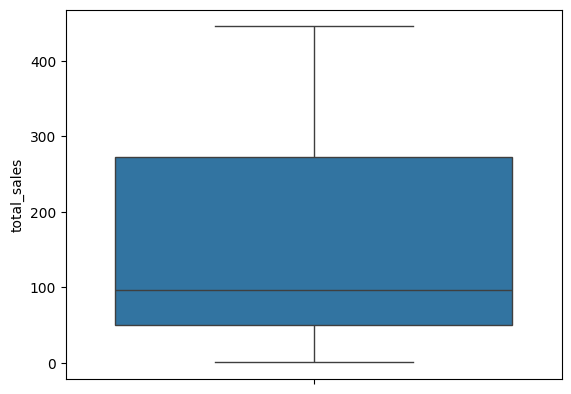

In [114]:
print(df_sales_per_platform.describe())
sns.boxplot(df_sales_per_platform)

Según los datos, el 75% de las plataformas registra ventas por debajo de los 270 millones de dólares (mdd), mientras que la plataforma con el mayor ingreso alcanza los 445 mdd. La desviación estándar, que mide la dispersión de los datos con respecto a la media, es alta. Esto significa que los valores varían significativamente en relación al promedio. Además, los datos presentan un sesgo hacia la derecha, lo que indica que la mayoría de las cifras están por encima de la mediana.

Si bien dentro de la gráfica no existen valores atipicos, el hecho de que el valor máximo esté tan lejos del 75% de los datos, podría causar que los resultados de futuras hipótesis se vean afectados. Intentaremos equilibrar los datos eliminando las dos plataformas con más ventas y volveremos a gráficar para ver si ha habido una diferencia.

In [116]:
df_games_filtered_2 = df_games_filtered[~df_games_filtered['platform'].isin(['PS3','X360', 'PS2'])]
df_sales_per_platform_2 = df_games_filtered_2.groupby('platform')['total_sales'].sum()
df_sales_per_platform_2.sort_values()

platform
PSP      29.01
DS       38.73
PSV      53.81
WiiU     82.19
Wii      95.02
PC       97.68
XOne    159.32
3DS     257.81
PS4     314.14
Name: total_sales, dtype: float64

count      9.000000
mean     125.301111
std       99.869897
min       29.010000
25%       53.810000
50%       95.020000
75%      159.320000
max      314.140000
Name: total_sales, dtype: float64


<Axes: ylabel='total_sales'>

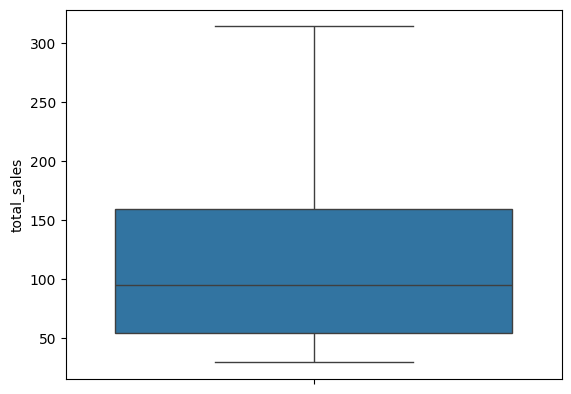

In [117]:
print(df_sales_per_platform_2.describe())
sns.boxplot(df_sales_per_platform_2)

### Reseñas
Analizaremos como las reseñas de la crítica y de los usarios influyen en la compra de los videojuegos para una plataforma.

In [118]:
# elegiremos la plataforma con más lanzamientos
df_games_filtered.groupby('platform')['name'].count().sort_values()

platform
PS2       7
WiiU    147
DS      184
Wii     197
XOne    247
PSP     312
PC      389
PS4     392
PSV     429
X360    498
3DS     512
PS3     708
Name: name, dtype: int64

#### Puntuación de la crítica

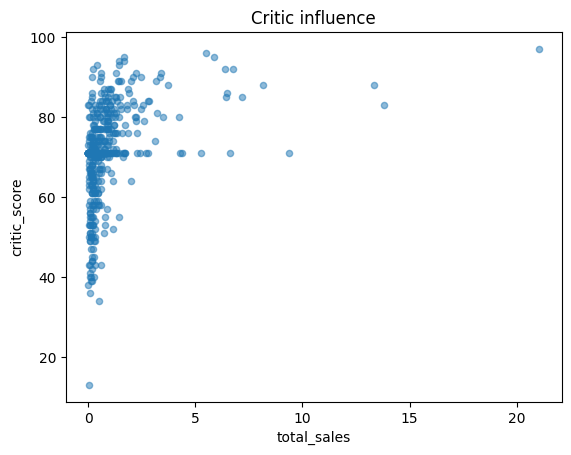

In [119]:
df_games_ps3 = df_games_filtered[df_games_filtered['platform']=='PS3']
df_games_ps3.plot(
    x='total_sales', 
    y='critic_score', 
    kind='scatter', 
    alpha= 0.5,
    title = 'Critic influence'
)
plt.show()

In [41]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_ps3['total_sales'].corr(df_games_ps3['critic_score']))

coeficiente de correlación: 0.35005116856453344


Observamos que existe una correlación positiva entre la opinión de la crítica y las ventas, aunque esta correlación es bastante débil, apenas alcanzando un valor de 0.35. Esto sugiere que la influencia de la opinión crítica en las ventas es limitada.

#### Puntuación de los usuarios

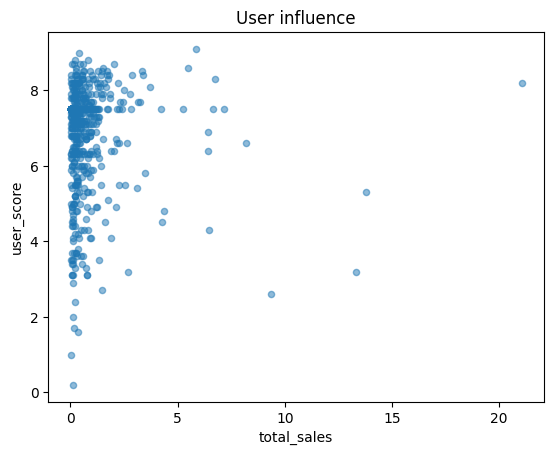

In [120]:
df_games_ps3.plot(
    x='total_sales', 
    y='user_score', 
    kind='scatter', 
    alpha= 0.5,
    title = 'User influence'
)
plt.show()

In [43]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_ps3['total_sales'].corr(df_games_ps3['user_score']))

coeficiente de correlación: -0.06974271262150586


La correlación entre las ventas y la puntuación de los usuarios es incluso negativa, por lo que podemos inferir que no hay relación alguna. Esto índica que la opinión de la crítica tiene una mayor influencia en las ventas en comparación con la opinión de los usuarios.

### Ventas en distintas plataformas
Compararemos las ventas de algunos juegos en distintas platafomas

In [121]:
# Obtenemos los juegos con más diversidad de plataformas
games = df_games_filtered.groupby('name')['platform'].count().sort_values().tail(6)
games

name
Lego Batman 3: Beyond Gotham    8
LEGO Jurassic World             8
Angry Birds Star Wars           8
FIFA 15                         8
LEGO Marvel Super Heroes        9
FIFA 14                         9
Name: platform, dtype: int64

<Axes: xlabel='platform', ylabel='total_sales'>

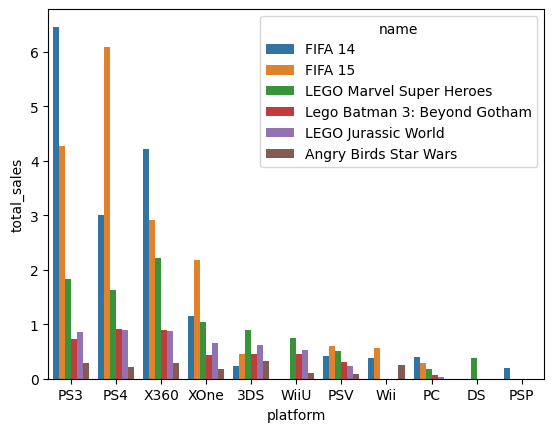

In [122]:
games = df_games_filtered[df_games_filtered['name'].isin(games.index)]
sns.barplot(data=games, x='platform', y='total_sales', hue='name')

Aunque las plataformas que los usarios eligen son muy variadas, podemos identificar algunas que destacan por su versatilidad y que tienen una mayor preferencia.

### Generos
Buscaremos cuales son los generos con mayores ventas.

In [123]:
agg_dict = {'total_sales': 'sum', 'name': 'count'}
df_genres = df_games_filtered.groupby('genre').agg(agg_dict).sort_values('total_sales')
df_genres

,total_sales,name
genre,,
Puzzle,9.85,71
Strategy,22.16,117
Adventure,45.04,410
Simulation,50.26,136
Fighting,66.90,159
Racing,88.31,180
Platform,88.68,122
Misc,139.42,375
Sports,237.15,389


Debido a la variabilidad en el número de videojuegos por género, no podemos determinar el éxito relativo de un género basándonos únicamente en las ventas totales. Sin embargo, podemos calcular una proporción en función de estos dos valores.

In [124]:
df_genres['mean']=df_genres['total_sales']/df_genres['name']
df_genres.sort_values('mean')

,total_sales,name,mean
genre,,,
Adventure,45.04,410,0.109854
Puzzle,9.85,71,0.138732
Strategy,22.16,117,0.189402
Simulation,50.26,136,0.369559
Misc,139.42,375,0.371787
Fighting,66.90,159,0.420755
Action,557.80,1269,0.439559
Racing,88.31,180,0.490611
Role-Playing,245.63,465,0.528237


En promedio, los juegos con mayores ingresos son los shooters, seguidos por los videojuegos de plataforma, y en tercer lugar se encuentran los videojuegos deportes.


## Perfil de usuario por región

### Las cinco principales plataformas para cada región

In [125]:
print(df_games_filtered.groupby('platform')['na_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('platform')['eu_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('platform')['jp_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('platform')['other_sales'].sum().sort_values().tail())

platform
3DS      82.65
XOne     93.12
PS4     108.74
PS3     168.26
X360    226.80
Name: na_sales, dtype: float64 

platform
PC       56.70
3DS      61.27
X360    117.10
PS4     141.09
PS3     163.10
Name: eu_sales, dtype: float64 

platform
PS4     15.96
PSV     21.84
PSP     24.04
PS3     49.39
3DS    100.62
Name: jp_sales, dtype: float64 

platform
3DS     13.27
XOne    14.27
X360    33.13
PS4     48.35
PS3     64.82
Name: other_sales, dtype: float64


En Norteamérica, las ventas más altas provienen de la consola Xbox 360, con un total de 226.80 millones de dólares.  
En Europa, la plataforma líder en ventas es la PS3, con 163.10 millones de dólares.  
En Japón, la preferida es la Nintendo DS, con 100.62 millones de dólares en ventas.  
En otros países, las ventas que predominan son las de la consola PS3.  
Podemos observar que el PS3 es una constante dentro de las plataformas principales de cada región.

### Los cinco principales géneros para cada región

In [126]:
print(df_games_filtered.groupby('genre')['na_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('genre')['eu_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('genre')['jp_sales'].sum().sort_values().tail(), '\n')
print(df_games_filtered.groupby('genre')['other_sales'].sum().sort_values().tail())

genre
Misc             69.69
Role-Playing     83.78
Sports          108.70
Shooter         194.43
Action          230.92
Name: na_sales, dtype: float64 

genre
Racing           40.58
Role-Playing     62.30
Sports           88.48
Shooter         148.02
Action          199.12
Name: eu_sales, dtype: float64 

genre
Platform        12.13
Fighting        12.38
Misc            17.60
Action          63.62
Role-Playing    79.87
Name: jp_sales, dtype: float64 

genre
Misc            12.41
Role-Playing    19.68
Sports          28.88
Shooter         48.54
Action          64.14
Name: other_sales, dtype: float64


Podemos observar que para todas las regiones, el genero de Acción ocupa uno de los primeros lugares dentro de las ventas. De hecho Norteamérica y Europa, comparten los primeros 4 generos, en el mismo orden, siendo el más vendido el genero de Acción.

### Clasificación de ESRB por región

In [127]:
print(df_games_filtered.groupby('rating')['na_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('rating')['eu_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('rating')['jp_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('rating')['other_sales'].sum().sort_values().tail())

rating
EC        0.42
E10+    117.72
T       171.88
E       210.95
M       328.79
Name: na_sales, dtype: float64
rating
RP        0.03
E10+     78.00
T       129.05
E       194.93
M       267.78
Name: eu_sales, dtype: float64
rating
RP        0.00
E10+     11.23
M        27.32
E        72.76
T       134.34
Name: jp_sales, dtype: float64
rating
EC       0.03
E10+    23.91
T       42.23
E       54.79
M       87.94
Name: other_sales, dtype: float64


En las todas las regiones, las cuatro clasificaciones principales son las mismas. Europa, Norteamérica y otros países comparten el mismo orden para las tres principales clasificaciones: 'M' (maduro +17), 'E' (para todos) y 'T' (adolecentes +13). Sin embargo, en Japón, el orden es un poco distinto, y los videojuegos con más ventas tienen la clasificación:'T' (adolecentes +13).

## Hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Para esta hipótesis, tomaremos la premisa original como la hipótesis nula. Comprobaremos cuál es la probabilidad de que no haya ninguna diferencia entre las calificación para estas dos plataformas.  
Por lo tanto, la hipótesis alternativa, será:"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes".

In [46]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada plataforma
sample_xone = df_games_filtered[df_games_filtered['platform']=='XOne']['user_score'].sample(n=50)
sample_pc = df_games_filtered[df_games_filtered['platform']=='PC']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_xone.var())
print('varianza 2:', sample_pc.var())

varianza 1: 1.550204081632653
varianza 2: 1.8500571428571428


In [47]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_xone, sample_pc, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.3362718347839504
No podemos rechazar la hipótesis nula


Al parecer la posibilidad de que ambas plataformas tengan la misma calificación, es lo suficientemente alta para no rechazar la hipótesis nula. Hay una probabilidad del 33.6% de que, en promedio, las plataformas Xbox One y PC tengan calificaciones iguales.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Esta hipótesis no se pude comprobar directamente, puesto que se tiene que partir de la igualdad. Por lo cuál se tomará la siguiente premisa comp hipótesis nula:  
"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales"  
y la hipótesis alternativa sería la premisa original.

In [48]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada genero
sample_action = df_games_filtered[df_games_filtered['genre']=='Action']['user_score'].sample(n=50)
sample_sports = df_games_filtered[df_games_filtered['genre']=='Sports']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_action.var())
print('varianza 2:', sample_sports.var())

varianza 1: 1.8399020408163265
varianza 2: 0.8390244897959186


In [49]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_action, sample_sports, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.9931260450834307
No podemos rechazar la hipótesis nula


El valor p, que determina la probabilidad de que ambos generos tengan la misma calificación promedio por parte de  los usarios, es más bajo que el nivel de significancia establecido. Por esta razón, rechazamos la hipótesis núla y podemos decir que es probable que las calificaciones promedio de los dos géneros sean diferente.

## Conclusión

En este proyecto se obtuvieron diferentes estadisticas para determinar cuál podría ser una campaña prometedora para el año siguiente.  
Inicialmente, se análizo en número de lanzamientos anuales, esto nos ayudo a definir un periodo en el que obtendríamos resultados más relevantes, ignorando los años anteriores en los que el número de lanzamientos era menor.  
Posteriormente, analizamos el comportamiento de diferentes plataformas atravez de los años, para ver cuál es en promedio el tiempo de vida de una plataforma en el mercado.
También, se creó un diagrama de caja, para ver la diferencia de las ventas en distintas plataformas.   Vimos cuál era la relación entre las reseñas y las ventas mediante diagramas de dispersión y como varían la ventas en distintas plataformas de determinados videojuegos.  
Obtuvimos una lista de los generos ordenada por popularidad.  
Asi mismo, se realizo un estudio por cada región para determinar cuales eran las principales plataformas, los principales generos y la clasificación de videojuegos con más ventas.  
Finalmente realizamos la prueba de dos hipotesis para determinar si dos plataformas y dos generos, tenían en promedio la misma calificación por parte de los usarios.  
Con respecto a los resulados obtenidos, podemos decir que un posible plan de negocio sería impulsar aquellas plataformas que recien ingresan al mercado, como pueden ser la PS4 y la Xbox One, así como aquellas plataformas más longebas, como la PC que se ha mantenido a pesar de los años. Esto con el objetivo de tener ventas a más largo plazo. Sin embargo debido a que muchos de los usarios ya cuentan con consolas de modelos anteriores, como el PS3, se podrían lanzar juegos multiplataforma que se puedan juegar en distinas versiones de la misma plataforma.  
Por otro lado si bien la puntuación de la crítica y de los usuarios tiene una influencia positiva, esto no determina inminentemente la cantidad de ventas de un videojuego. Además con respecto a los generos y las plataformas análizadas, no se obtuvo una diferencia contundente. 
También hay que resaltar, que uno de los generos en los cuales no hay tanta variedad de videjuegos y es uno de los más rentables, es el de Shooters, por lo que se podría pensar en invertir más en el desarrollo de videjuegos de este genero.
Por ultimo, los generos y las clasificaciones preferidas por usuarios de diferentes regiones, y en las que se debería poner más atención, son los videojuegos de acción y la E ('para todo publico').